In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

"""
🤖 Understanding ReLU & Sigmoid (Super Simple Explanation for a 10-Year-Old)

Imagine you are teaching a robot to understand numbers and make decisions. 
The robot processes numbers using special switches called activation functions. 
Two important ones are:

1️⃣ ReLU (Rectified Linear Unit) → Helps the robot stay positive
2️⃣ Sigmoid → Helps the robot decide between two choices

------------------------------------------------------------
🔹 ReLU (Rectified Linear Unit)
------------------------------------------------------------
💡 What is it?
- If the number is positive, keep it the same.
- If the number is negative, change it to zero.

📌 Simple Rule:
    ReLU(x) = max(0, x)

✅ Example:
    Input    | ReLU Output
    ----------------------
      5      | 5
     -3      | 0
     10      | 10
     -7      | 0

🚀 Why Use ReLU?
- It helps the model focus only on important (positive) signals.
- It makes learning faster and more efficient.

🧠 Think of it like a broken calculator that only shows numbers 0 or bigger.
   If you type -5, it just says 0! 😆

------------------------------------------------------------
🔹 Sigmoid (For Yes/No Decisions)
------------------------------------------------------------
💡 What is it?
- Takes any number and squishes it between 0 and 1.
- If the output is close to 1, it means YES (e.g., "Sweet Chocolate 🍫").
- If the output is close to 0, it means NO (e.g., "Bitter Chocolate 🏴").

📌 Simple Rule:
    Sigmoid(x) = 1 / (1 + e^(-x))

✅ Example:
    Input    | Sigmoid Output (Probability) | Meaning
    ---------------------------------------
      5      | 0.99                         | Almost YES ✅
     -3      | 0.05                         | Almost NO ❌
      0      | 0.50                         | Maybe 🤔
     10      | 0.999                        | Definitely YES 🚀

🚀 Why Use Sigmoid?
- It's perfect for binary classification (Yes/No, Sweet/Bitter, 0/1).
- It gives a probability score between 0 and 1.

🧠 Think of it like a magic ball 🎱 that gives answers between 0% (No) and 100% (Yes). 

"""

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


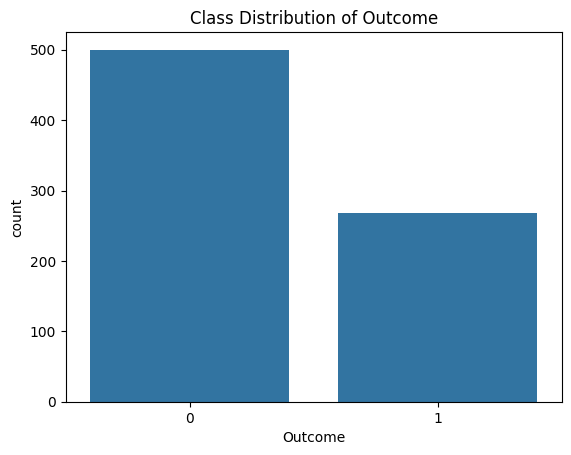

In [92]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each class
sns.countplot(x=diabetes_data["Outcome"])
plt.title("Class Distribution of Outcome")
plt.show()


In [4]:
diabetes_data.shape

(768, 9)

In [5]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
x = diabetes_data.drop(columns = 'Outcome', axis = 1)
y = diabetes_data['Outcome']

In [9]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
diabetes_data.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape

((768, 9), (614, 8), (154, 8), (614,), (154,))

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

normalising data values using standard scaler so that all features have  a mean of 0 and a standard deviation of 1.

In [14]:
X_test

array([[ 0.68185612, -0.71402038, -0.61712658, ...,  0.26073561,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.27664283,  0.30191569, ...,  0.48053518,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.40160784, -0.29275872, ..., -0.15300476,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.80774414,  0.13973176, ...,  0.62275843,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.78555979,  0.03160914, ..., -0.51502758,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.46381046,  0.03160914, ...,  0.42881763,
         0.70068816,  0.53008521]])

In [15]:
X_train

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [83]:
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Prevent overfitting
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')  # Binary classification output
])

In [84]:
mlp.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

- The model needs instructions on how to learn and improve.
- Compilation sets up the learning process by choosing:
  - An optimizer (how to adjust weights)
  - A loss function (how to measure mistakes)
  - Performance metrics (how well it's learning)

- **optimizer=Adam(learning_rate=0.0005)** → Adam optimizer adjusts weights to minimize errors.
- **loss='binary_crossentropy'** → Used for classification with two possible outcomes (0 or 1).
- **metrics=['accuracy']** → Measures how often the model makes correct predictions.

Think of it like setting up training rules for an athlete! The optimizer is the coach, the loss function is feedback on mistakes, and accuracy is the scoreboard

In [85]:
history = mlp.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 0.8920 - accuracy: 0.4511 - val_loss: 0.8305 - val_accuracy: 0.6429
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8528 - accuracy: 0.5293 - val_loss: 0.8155 - val_accuracy: 0.6364
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8350 - accuracy: 0.5847 - val_loss: 0.8015 - val_accuracy: 0.6364
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8196 - accuracy: 0.6336 - val_loss: 0.7889 - val_accuracy: 0.6429
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8199 - accuracy: 0.6270 - val_loss: 0.7765 - val_accuracy: 0.6429
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8061 - accuracy: 0.6515 - val_loss: 0.7646 - val_accuracy: 0.6429
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7890 - accuracy: 0.6384 - val_loss: 0.7530 - val_accuracy: 0.6429
Epoch 8/100


In [86]:
mlp_accuracy = mlp.evaluate(X_test, y_test, verbose=0)[1]
y_pred_mlp = (mlp.predict(X_test) > 0.5).astype(int)

5/5 [==============================] - 0s 1ms/step


In [87]:
print(f"MLP Accuracy: {mlp_accuracy}")

MLP Accuracy: 0.7662337422370911


In [88]:
import matplotlib.pyplot as plt

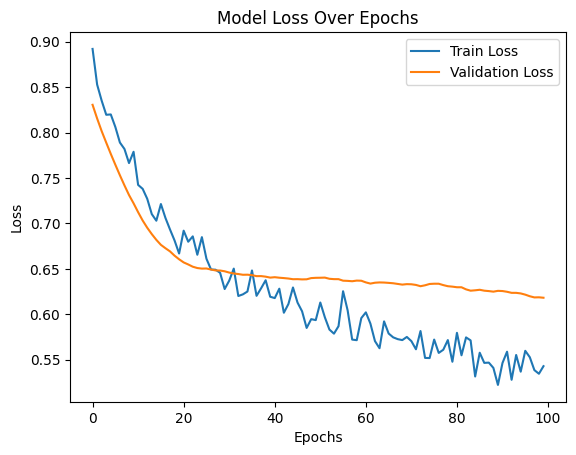

In [89]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()
